# Markdown 

Blake Kell

Project Area: Software

Groupmates: Kudzai Dhewa and Alec Chen

Main RQ:  Which open-source libraries represent the greatest systemic risk and economic value to the software ecosystem?

Implicit RQs:
What is the quality and security of OSS over time? 
Can we use this data to predict future vulnerabilities?
How has the value of OSS changed over time?


In [3]:
import warnings 


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df_structural = pd.read_csv('analysis_ready_data.csv')


df_structural.head()

,package,in_degree_centrality,out_degree_centrality
0,numpy,0.000000,0.041322
1,matplotlib,0.115702,0.033058
2,scipy,0.000000,0.033058
3,pandas,0.338843,0.024793
4,lxml,0.000000,0.024793


### Dataset 1: Dependency Analysis Metrics

*   **Source:** Pre-computed from the Libraries.io API via a custom Python data pipeline.
*   **Description:** This dataset contains the structural importance of Python packages, measured by In-Degree (dependencies) and Out-Degree (dependents) Centrality.
*   **Limitations:** The analysis is limited to a small list of packages for testing purposes. The centrality scores are relative to this small sample and do not represent the global ecosystem.


This is the current list of packages the pipeline explicitly calls for. 
Note: the pipeline automatically populates with all other package found in the dependecies so the csv itself is much larger.

requests
pandas
numpy
scikit-learn
matplotlib
seaborn
flask
django
sqlalchemy
networkx
beautifulsoup4
pytest

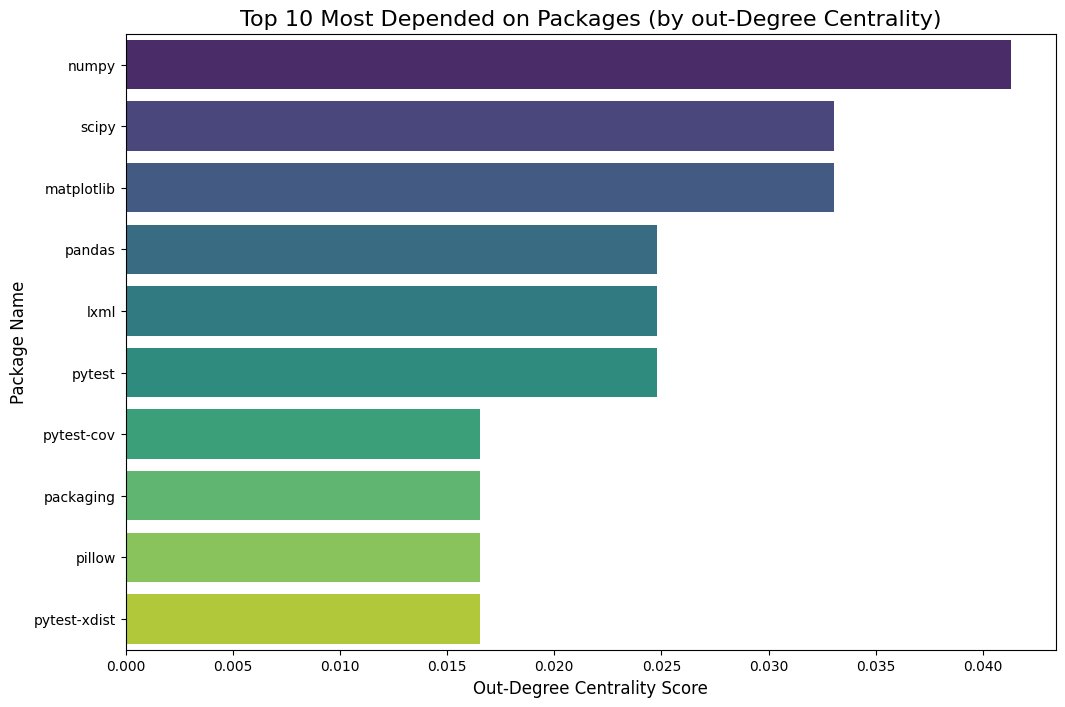

In [33]:
warnings.filterwarnings('ignore', category=FutureWarning)

df_top_in_degree = df_structural.sort_values(by='out_degree_centrality', ascending=False).head(10)

plt.figure(figsize=(12, 8))
sns.barplot(x='out_degree_centrality', y='package', data=df_top_in_degree, palette='viridis')

plt.title('Top 10 Most Depended on Packages (by out-Degree Centrality)', fontsize=16)
plt.xlabel('Out-Degree Centrality Score', fontsize=12)
plt.ylabel('Package Name', fontsize=12)

plt.show()



In [ ]:
import os
import json


# Get the list of top packages from the out-degree chart DataFrame
top_packages =  ["numpy","pandas"]

github_summary_data = []

for packages in top_packages:


    json_path = os.path.join('data', 'raw_json', f"{packages}.json")


    if os.path.exists(json_path):
        with open(json_path, 'r') as f:
            data = json.load(f)

        
        github_summary_data.append({
            'package': packages,
            'stars': data.get('stars', 0),
            'forks': data.get('forks', 0),
            'language': data.get('language', 'N/A'),
            'contributors_count': data.get('contributions_count', 0)
        })


df_github_summary = pd.DataFrame(github_summary_data)

print(df_github_summary)

df_github_summary.info()

  package  stars  forks language  contributors_count
0   numpy  30288  11281   Python                1004
1  pandas  46465  18869   Python                1114
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   package             2 non-null      object
 1   stars               2 non-null      int64 
 2   forks               2 non-null      int64 
 3   language            2 non-null      object
 4   contributors_count  2 non-null      int64 
dtypes: int64(3), object(2)
memory usage: 212.0+ bytes


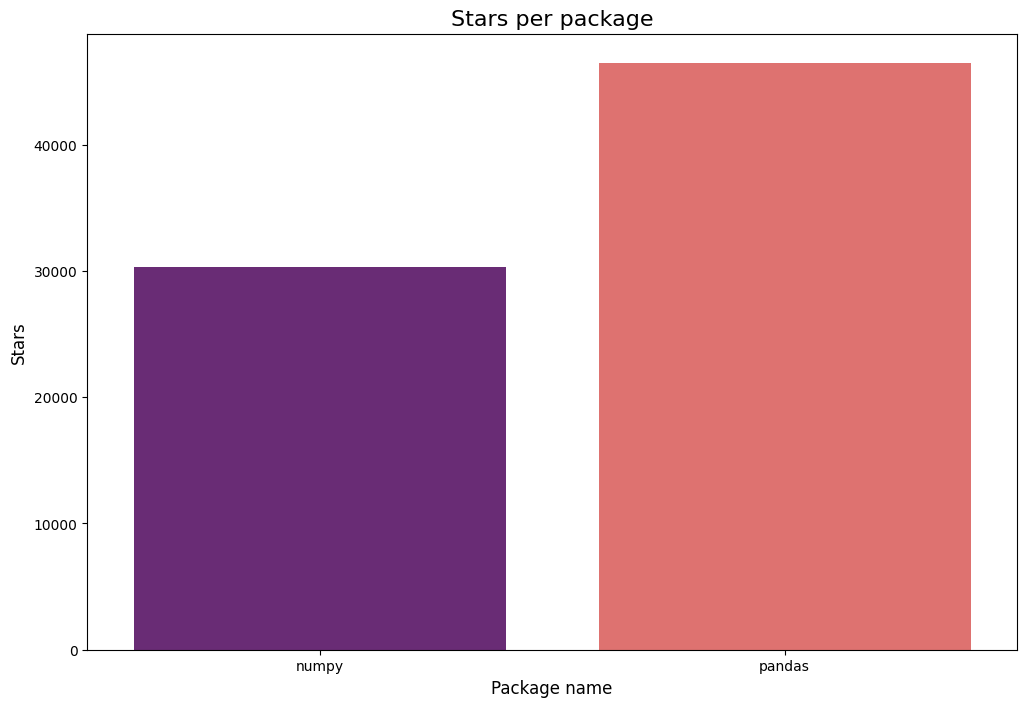

In [34]:
warnings.filterwarnings('ignore', category=FutureWarning)

plt.figure(figsize=(12, 8))

sns.barplot(x='package', y='stars', data=df_github_summary,palette='magma')


plt.title('Stars per package', fontsize=16)
plt.xlabel('Package name', fontsize=12)
plt.ylabel('Stars', fontsize=12)


plt.show()


### Dataset 2: Package Attribute analysis

*   **Source:** Pre-computed data aggregated by the Libraries.io API, extracted from locally cached raw JSON files generated by initial fetch. 
*   **Description:** This dataset contains a summary of package rating and community engagement for two key packages: `numpy` (a highly foundational package) and `pandas` (a highly complex package). The data includes  community engagement metrics like star and fork counts.
*   **Limitations:** The data set just serves to show that we can join by package name. Its also just a snippet of the raw data, the full dataset will be produced in a similar manner by scraping raw jsons.



### Joining datasets

We can join data sets by package column to create a generic full table. However, I was thinking that the value of joining the community engagement with the dependency graph values is that we can come up with a more complete view of an individual package's impact. Such that we can have all of these individual columns, but also use this new information to enrich the current metric calculation and include new formulas for a monetary estimation. Allowing further economic analysis by calculating a stand alone economic value and also one that is multiplied by relative amount of dependents it has.

### AI Statement 

The AI's contributions to this Jupyter Notebook included:

*   **Boilerplate Code:** Provided the initial Python code for loading the CSV with `pandas` and setting up the basic visualization structure with `matplotlib` and `seaborn`.

*   **Conceptual Sounding Board:** Helped formalize the markdown descriptions for the datasets and the joining logic, translating my analytical ideas into a clear, written format.

/Users/blakekell/Documents/Python/graph_pipeline/pipeline/lib/python3.11/site-packages/seaborn/regression.py:598: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


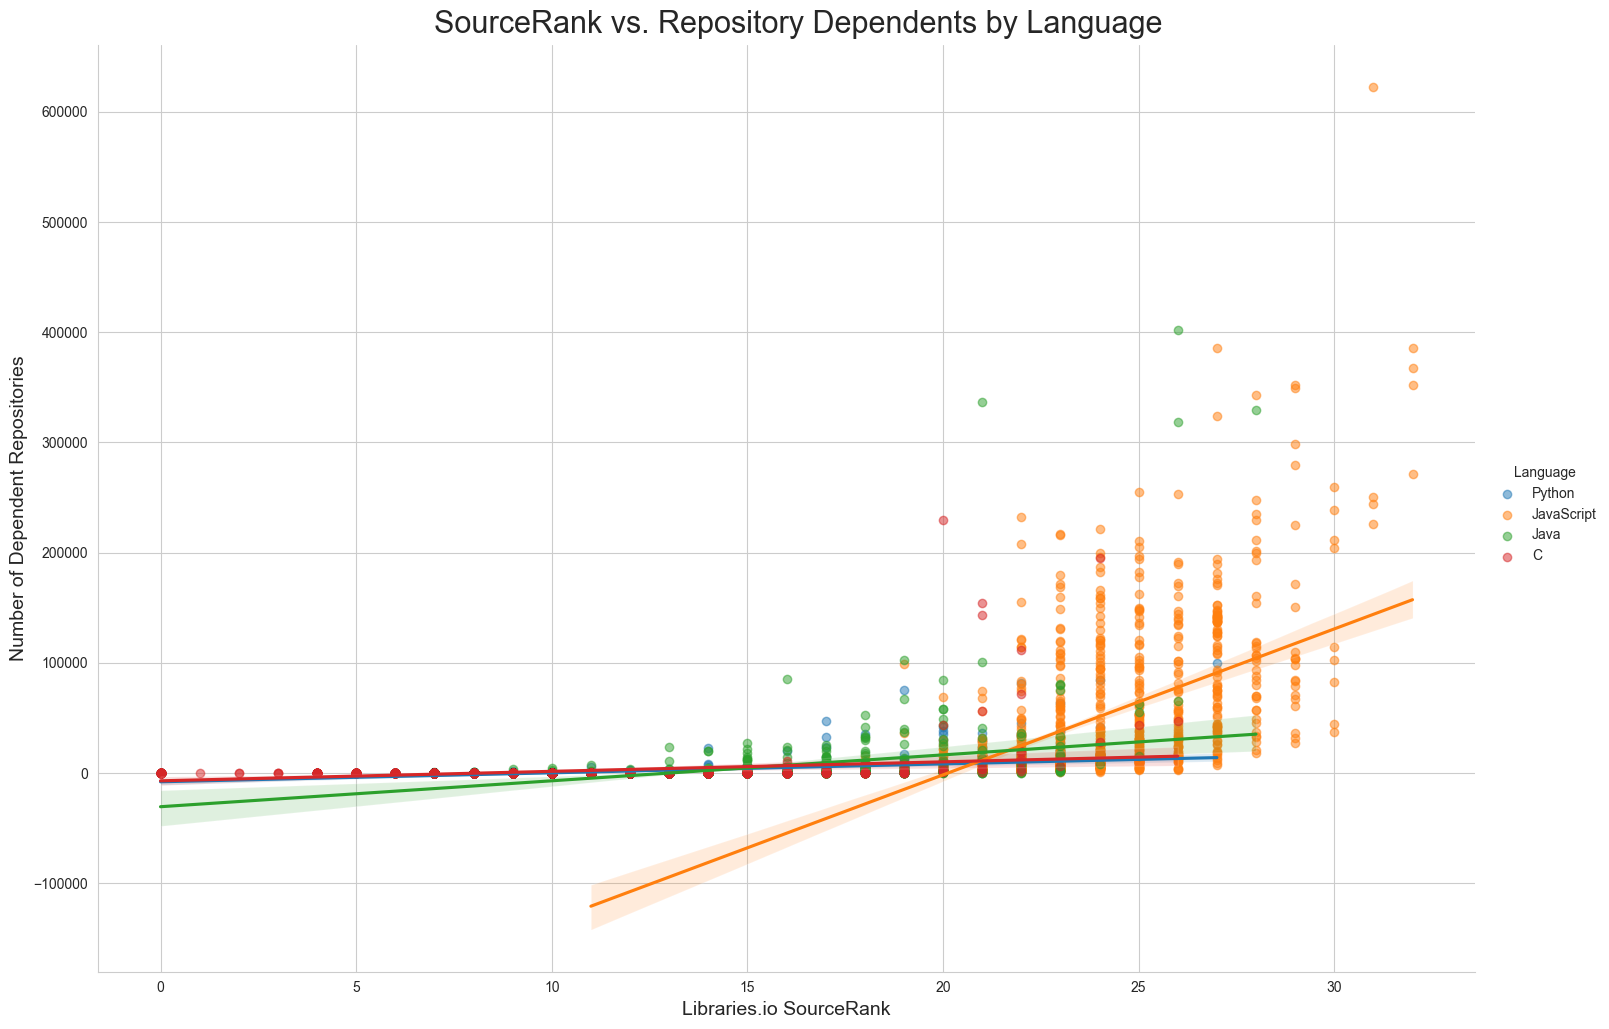

In [11]:
enriched_df = pd.read_csv('top1000librariesofpy_java_js_C.csv')



# It's good practice to filter out extreme outliers that might skew the plot,
# but for now, we'll plot the raw data.
# You might want to filter `df` before passing it to the plot.



# Use sns.lmplot() as it is designed to handle the 'hue' parameter for regression lines
g = sns.lmplot(
    data=enriched_df,
    x='sourcerank',
    y='dependent_repositories_count',
    hue='Language',          # This is the key: color points AND create lines by language
    height=10,               # Make the plot larger
    aspect=1.5,              # Make it wider than it is tall
    scatter_kws={'alpha': 0.5}, # Add transparency to the points
    legend_out=True          # Keep the legend outside the plot area
)

# --- Add Titles and Labels (lmplot returns a FacetGrid object, so we use its methods) ---

# Set a main title for the entire figure
g.fig.suptitle('SourceRank vs. Repository Dependents by Language', fontsize=22, y=1.02) # y adjusts vertical position

# Set the axis labels
g.set_axis_labels('Libraries.io SourceRank', 'Number of Dependent Repositories', fontsize=14)

# Set a title for the legend
g.legend.set_title("Language")

# --- Display the final plot ---
plt.show()

